In [8]:
import pandas as pd
import numpy as np
import warnings
# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
#import psycopg2

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression

# Set random seed 
RSEED = 42
warnings.filterwarnings("ignore")

In [9]:
pip install -U airportsdata

Note: you may need to restart the kernel to use updated packages.


In [10]:
import airportsdata
# Load the airports data
airports = airportsdata.load()

# Convert the airports data into a DataFrame
airports_df = pd.DataFrame(airports)
airports_df


,00AA,00AK,00AL,00AN,00AR,00AS,00CA,00CL,00FA,00FL,...,ZYQQ,ZYTH,ZYTL,ZYTN,ZYTX,ZYXC,ZYYJ,ZYYY,_AYM,_OUK
icao,00AA,00AK,00AL,00AN,00AR,00AS,00CA,00CL,00FA,00FL,...,ZYQQ,ZYTH,ZYTL,ZYTN,ZYTX,ZYXC,ZYYJ,ZYYY,_AYM,_OUK
iata,,,,,,,,,,,...,NDG,,DLC,TNH,SHE,XEN,YNJ,,AYM,OUK
name,Aero B Ranch Airport,Lowell Field,Epps Airpark,Katmai Lodge Airport,Arland Airport,Fulton Airport,Goldstone /Gts/ Airport,Williams Ag Airport,Grass Patch Airport,River Oak Airport,...,Qiqihar Sanjiazi Airport,Tahe Airport,Zhoushuizi Airport,Tonghua Sanyuanpu Airport,Taoxian Airport,Xingcheng Air Base,Yanji Chaoyangchuan Airport,Shenyang Dongta Airport,Yas Island Seaplane Base,Out Skerries Airstrip
city,Leoti,Anchor Point,Harvest,King Salmon,Bennington,Alex,Barstow,Biggs,Bushnell,Okeechobee,...,Qiqihar,Tahe,Dalian,Tonghua,Shenyang,,Yanji,Shenyang,Yas Island,Shetland
subd,Kansas,Alaska,Alabama,Alaska,Kansas,Oklahoma,California,California,Florida,Florida,...,Heilongjiang,Heilongjiang,Liaoning,Jilin,Liaoning,Liaoning,Jilin,Liaoning,Abu Dhabi,Scotland
country,US,US,US,US,US,US,US,US,US,US,...,CN,CN,CN,CN,CN,CN,CN,CN,AE,GB
elevation,3435.0,252.0,820.0,80.0,1352.0,1100.0,3038.0,87.0,53.0,35.0,...,477.0,1240.0,107.0,1200.0,198.0,30.0,624.0,0.0,0.0,20.0
lat,38.704022,59.948889,34.86481,59.093472,38.969651,34.942803,35.354972,39.427189,28.645547,27.23088,...,47.239601,52.224444,38.965698,42.253889,41.639801,40.580299,42.882801,41.784401,24.467,60.425583
lon,-101.473911,-151.692222,-86.770278,-156.455833,-97.601557,-97.818019,-116.885208,-121.763428,-82.218975,-80.969231,...,123.917999,124.720222,121.539001,125.703333,123.483002,120.697998,129.451004,123.496002,54.6103,-0.7466
tz,America/Chicago,America/Anchorage,America/Chicago,America/Anchorage,America/Chicago,America/Chicago,America/Los_Angeles,America/Los_Angeles,America/New_York,America/New_York,...,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Dubai,Europe/London


In [11]:
# Transpose the DataFrame
airports_df = airports_df.transpose()
# If you want to reset the index of the transposed DataFrame
airports_df.reset_index(drop=True, inplace=True)

In [12]:
airports_df

,icao,iata,name,city,subd,country,elevation,lat,lon,tz,lid
0,00AA,,Aero B Ranch Airport,Leoti,Kansas,US,3435.0,38.704022,-101.473911,America/Chicago,00AA
1,00AK,,Lowell Field,Anchor Point,Alaska,US,252.0,59.948889,-151.692222,America/Anchorage,00AK
2,00AL,,Epps Airpark,Harvest,Alabama,US,820.0,34.86481,-86.770278,America/Chicago,00AL
3,00AN,,Katmai Lodge Airport,King Salmon,Alaska,US,80.0,59.093472,-156.455833,America/Anchorage,00AN
4,00AR,,Arland Airport,Bennington,Kansas,US,1352.0,38.969651,-97.601557,America/Chicago,00AR
...,...,...,...,...,...,...,...,...,...,...,...
28171,ZYXC,XEN,Xingcheng Air Base,,Liaoning,CN,30.0,40.580299,120.697998,Asia/Shanghai,
28172,ZYYJ,YNJ,Yanji Chaoyangchuan Airport,Yanji,Jilin,CN,624.0,42.882801,129.451004,Asia/Shanghai,
28173,ZYYY,,Shenyang Dongta Airport,Shenyang,Liaoning,CN,0.0,41.784401,123.496002,Asia/Shanghai,
28174,_AYM,AYM,Yas Island Seaplane Base,Yas Island,Abu Dhabi,AE,0.0,24.467,54.6103,Asia/Dubai,


In [13]:
df_train = pd.read_csv('data/train.csv')
df_train.shape
df = df_train.copy()
df

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [14]:
# Selecting required columns from airports_df1
selected_airports_df = airports_df[['lat', 'lon', 'iata']]

# Merge for departure airport details
df1 = df.merge(selected_airports_df.rename(columns={'lat': 'dep_lat', 'lon': 'dep_lon'}),
              left_on='DEPSTN', right_on='iata', how='left')

# # Merge for arrival airport details
df2 = df1.merge(selected_airports_df.rename(columns={'lat': 'arr_lat', 'lon': 'arr_lon'}),
              left_on='ARRSTN', right_on='iata', how='left')

# Drop the redundant 'iata' columns
#df.drop(['iata_x', 'iata_y'], axis=1, inplace=True)

# Optionally, drop other redundant columns if necessary
# df.drop(['DEPSTN_x', 'ARRSTN_x', 'DEPSTN_y', 'ARRSTN_y'], axis=1, inplace=True)

# Display the updated DataFrame
df2.drop(['iata_x', 'iata_y'], axis=1, inplace=True)
df2

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,36.851002,10.2272,36.851002,10.2272
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,33.875,10.7755,36.851002,10.2272
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,36.851002,10.2272,36.851002,10.2272
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,36.851002,10.2272,33.875,10.7755


In [15]:
df = df2.copy()

In [16]:

# Convert DATOP column to datetime format
df['DATOP'] = pd.to_datetime(df['DATOP'])

# Extract year, month, day, and week
df['Year'] = df['DATOP'].dt.year
df['Month'] = df['DATOP'].dt.month
df['Day'] = df['DATOP'].dt.day
df['Weekday'] = df['DATOP'].dt.dayofweek  # Monday=0, Sunday=6

# Reorder columns
#df = df[['FLTID','DATOP', 'Year', 'Month', 'Day', 'Weekday', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC', 'target']]


df

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon,Year,Month,Day,Weekday
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272,2016,1,3,6
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272,2016,1,13,2
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752,2016,1,16,5
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073,2016,1,17,6
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541,2016,1,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,36.851002,10.2272,36.851002,10.2272,2018,7,5,3
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,33.875,10.7755,36.851002,10.2272,2018,1,13,5
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,36.851002,10.2272,36.851002,10.2272,2018,11,7,2
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,36.851002,10.2272,33.875,10.7755,2018,1,23,1


In [17]:
# Convert STD and STA columns to datetime objects with correct format
df['STD'] = pd.to_datetime(df['STD'], format='%Y-%m-%d %H:%M:%S')
df['STA'] = pd.to_datetime(df['STA'], format='%Y-%m-%d %H.%M.%S')

# Calculate flight duration in minutes
df['Flight_Duration'] = (df['STA'] - df['STD']).dt.total_seconds() / 60

df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon,Year,Month,Day,Weekday,Flight_Duration
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272,2016,1,3,6,145.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272,2016,1,13,2,110.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752,2016,1,16,5,155.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073,2016,1,17,6,170.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541,2016,1,17,6,80.0


In [18]:
# Split STD column into date and time columns
df['STD_Date'] = pd.to_datetime(df['STD']).dt.date
df['STD_Time'] = pd.to_datetime(df['STD']).dt.time

# Split STA column into date and time columns
df['STA_Date'] = pd.to_datetime(df['STA']).dt.date
df['STA_Time'] = pd.to_datetime(df['STA']).dt.time

# Drop the original STD and STA columns
df.drop(columns=['STD', 'STA'], inplace=True)

# Print the DataFrame to verify the changes
df


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,dep_lat,dep_lon,...,arr_lon,Year,Month,Day,Weekday,Flight_Duration,STD_Date,STD_Time,STA_Date,STA_Time
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,ATA,TU 32AIMN,260.0,33.3675,-7.58997,...,10.2272,2016,1,3,6,145.0,2016-01-03,10:30:00,2016-01-03,12:55:00
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,ATA,TU 31BIMO,20.0,45.6306,8.72811,...,10.2272,2016,1,13,2,110.0,2016-01-13,15:05:00,2016-01-13,16:55:00
2,train_id_2,2016-01-16,TU 0214,TUN,IST,ATA,TU 32AIMN,0.0,36.851002,10.2272,...,28.752,2016,1,16,5,155.0,2016-01-16,04:10:00,2016-01-16,06:45:00
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,ATA,TU 736IOK,0.0,33.875,10.7755,...,-1.61073,2016,1,17,6,170.0,2016-01-17,14:10:00,2016-01-17,17:00:00
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,ATA,TU 320IMU,22.0,36.851002,10.2272,...,3.21541,2016,1,17,6,80.0,2016-01-17,14:30:00,2016-01-17,15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,SCH,TU 32AIML,0.0,36.851002,10.2272,...,10.2272,2018,7,5,3,180.0,2018-07-05,23:00:00,2018-07-06,02:00:00
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,SCH,UG AT7AT7,0.0,33.875,10.7755,...,10.2272,2018,1,13,5,60.0,2018-01-13,08:00:00,2018-01-13,09:00:00
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,SCH,TU 736IOK,0.0,36.851002,10.2272,...,10.2272,2018,11,7,2,470.0,2018-11-07,05:00:00,2018-11-07,12:50:00
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,ATA,TU CR9ISA,0.0,36.851002,10.2272,...,10.7755,2018,1,23,1,45.0,2018-01-23,18:00:00,2018-01-23,18:45:00


In [19]:
# Define mapping dictionary
status_mapping = {'ATA': 0, 'DEP': 1, 'RTR': 2, 'SCH': 3, 'DEL': 4}

# Map the values in the 'STATUS' column using the mapping dictionary
df['STATUS'] = df['STATUS'].map(status_mapping)

# Print the unique values in the 'STATUS' column
print(df['STATUS'].unique()) 

[0 1 2 3 4]


In [20]:
# Convert 'dep_lat' and 'dep_lon' to numerical values
df['dep_lat'] = pd.to_numeric(df['dep_lat'])
df['dep_lon'] = pd.to_numeric(df['dep_lon'])

# Convert 'arr_lat' and 'arr_lon' to numerical values
df['arr_lat'] = pd.to_numeric(df['arr_lat'])
df['arr_lon'] = pd.to_numeric(df['arr_lon'])

In [21]:
df

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,dep_lat,dep_lon,...,arr_lon,Year,Month,Day,Weekday,Flight_Duration,STD_Date,STD_Time,STA_Date,STA_Time
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,0,TU 32AIMN,260.0,33.367500,-7.58997,...,10.22720,2016,1,3,6,145.0,2016-01-03,10:30:00,2016-01-03,12:55:00
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,0,TU 31BIMO,20.0,45.630600,8.72811,...,10.22720,2016,1,13,2,110.0,2016-01-13,15:05:00,2016-01-13,16:55:00
2,train_id_2,2016-01-16,TU 0214,TUN,IST,0,TU 32AIMN,0.0,36.851002,10.22720,...,28.75200,2016,1,16,5,155.0,2016-01-16,04:10:00,2016-01-16,06:45:00
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,0,TU 736IOK,0.0,33.875000,10.77550,...,-1.61073,2016,1,17,6,170.0,2016-01-17,14:10:00,2016-01-17,17:00:00
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,0,TU 320IMU,22.0,36.851002,10.22720,...,3.21541,2016,1,17,6,80.0,2016-01-17,14:30:00,2016-01-17,15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,3,TU 32AIML,0.0,36.851002,10.22720,...,10.22720,2018,7,5,3,180.0,2018-07-05,23:00:00,2018-07-06,02:00:00
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,3,UG AT7AT7,0.0,33.875000,10.77550,...,10.22720,2018,1,13,5,60.0,2018-01-13,08:00:00,2018-01-13,09:00:00
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,3,TU 736IOK,0.0,36.851002,10.22720,...,10.22720,2018,11,7,2,470.0,2018-11-07,05:00:00,2018-11-07,12:50:00
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,0,TU CR9ISA,0.0,36.851002,10.22720,...,10.77550,2018,1,23,1,45.0,2018-01-23,18:00:00,2018-01-23,18:45:00


In [22]:
# Check if any value in the result is False
result = (df['STD_Date'] != df['STA_Date']).any()

# Print the result
print("Any value is False:", result)

# Perform the comparison
condition = df['STD_Date'] != df['STA_Date']

# Use boolean indexing to filter the DataFrame based on the condition
filtered_df = df[condition]

# Print the filtered DataFrame
filtered_df

Any value is False: True


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,dep_lat,dep_lon,...,arr_lon,Year,Month,Day,Weekday,Flight_Duration,STD_Date,STD_Time,STA_Date,STA_Time
12,train_id_12,2016-01-20,TU 0913,TUN,MED,0,TU 320IMR,0.0,36.851002,10.2272,...,39.705101,2016,1,20,2,260.0,2016-01-20,19:40:00,2016-01-21,00:00:00
18,train_id_18,2016-01-22,TU 0913,TUN,MED,0,TU 320IMT,30.0,36.851002,10.2272,...,39.705101,2016,1,22,4,260.0,2016-01-22,19:40:00,2016-01-23,00:00:00
23,train_id_23,2016-02-01,TU 0913,TUN,MED,0,TU 320IMT,10.0,36.851002,10.2272,...,39.705101,2016,2,1,0,260.0,2016-02-01,19:40:00,2016-02-02,00:00:00
51,train_id_51,2016-02-08,TU 0913,TUN,MED,0,TU 320IMR,0.0,36.851002,10.2272,...,39.705101,2016,2,8,0,260.0,2016-02-08,19:40:00,2016-02-09,00:00:00
68,train_id_68,2016-03-01,TU 6021,DJE,JED,0,TU 320IMW,0.0,33.875000,10.7755,...,39.156502,2016,3,1,1,255.0,2016-03-01,22:00:00,2016-03-02,02:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107816,train_id_107816,2018-01-15,AOG 0000,TUN,TUN,3,TU 320IMR,0.0,36.851002,10.2272,...,10.227200,2018,1,15,0,360.0,2018-01-15,22:00:00,2018-01-16,04:00:00
107818,train_id_107818,2018-12-31,WKL 0000,TUN,TUN,3,TU 32AIMF,0.0,36.851002,10.2272,...,10.227200,2018,12,31,0,180.0,2018-12-31,22:00:00,2019-01-01,01:00:00
107825,train_id_107825,2018-08-08,WKL 0000,TUN,TUN,3,TU 320IMV,0.0,36.851002,10.2272,...,10.227200,2018,8,8,2,180.0,2018-08-08,22:00:00,2018-08-09,01:00:00
107827,train_id_107827,2018-12-19,SGT 0000,TUN,TUN,3,TU 736IOP,0.0,36.851002,10.2272,...,10.227200,2018,12,19,2,120.0,2018-12-19,23:45:00,2018-12-20,01:45:00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               107833 non-null  object        
 1   DATOP            107833 non-null  datetime64[ns]
 2   FLTID            107833 non-null  object        
 3   DEPSTN           107833 non-null  object        
 4   ARRSTN           107833 non-null  object        
 5   STATUS           107833 non-null  int64         
 6   AC               107833 non-null  object        
 7   target           107833 non-null  float64       
 8   dep_lat          107501 non-null  float64       
 9   dep_lon          107501 non-null  float64       
 10  arr_lat          107501 non-null  float64       
 11  arr_lon          107501 non-null  float64       
 12  Year             107833 non-null  int32         
 13  Month            107833 non-null  int32         
 14  Day              107

In [33]:
df.columns

Index(['DATOP', 'STATUS', 'target', 'dep_lat', 'dep_lon', 'arr_lat', 'arr_lon',
       'Month', 'Day', 'Weekday', 'Flight_Duration'],
      dtype='object')

In [34]:
df = df.drop(['DATOP'], axis =1)

In [35]:
df

,STATUS,target,dep_lat,dep_lon,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
0,0,260.0,33.367500,-7.58997,36.851002,10.22720,1,3,6,145.0
1,0,20.0,45.630600,8.72811,36.851002,10.22720,1,13,2,110.0
2,0,0.0,36.851002,10.22720,41.275333,28.75200,1,16,5,155.0
3,0,0.0,33.875000,10.77550,47.153198,-1.61073,1,17,6,170.0
4,0,22.0,36.851002,10.22720,36.691002,3.21541,1,17,6,80.0
...,...,...,...,...,...,...,...,...,...,...
107828,3,0.0,36.851002,10.22720,36.851002,10.22720,7,5,3,180.0
107829,3,0.0,33.875000,10.77550,36.851002,10.22720,1,13,5,60.0
107830,3,0.0,36.851002,10.22720,36.851002,10.22720,11,7,2,470.0
107831,0,0.0,36.851002,10.22720,33.875000,10.77550,1,23,1,45.0


In [36]:
df.describe()

,STATUS,target,dep_lat,dep_lon,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
count,107833.000000,107833.000000,107501.000000,107501.000000,107501.000000,107501.000000,107833.000000,107833.000000,107833.000000,107833.000000
mean,0.383788,48.733013,38.472802,8.751242,38.474117,8.753088,6.681211,15.956396,3.124999,222.629687
std,0.997781,117.135562,7.654765,8.453875,7.652201,8.454613,3.292267,8.884317,2.026583,5077.970136
min,0.000000,0.000000,-11.591300,-73.740799,-11.591300,-73.740799,1.000000,1.000000,0.000000,10.000000
25%,0.000000,0.000000,35.857498,5.221424,35.857498,5.221424,4.000000,8.000000,1.000000,95.000000
50%,0.000000,14.000000,36.851002,10.227200,36.851002,10.227200,7.000000,16.000000,3.000000,140.000000
75%,0.000000,43.000000,43.629101,10.691000,43.629101,10.691000,9.000000,24.000000,5.000000,165.000000
max,4.000000,3451.000000,63.985001,51.613766,59.800301,51.613766,12.000000,31.000000,6.000000,719520.000000


In [44]:
import missingno as msno

# Visualize missing values using the matrix plot
msno.matrix(df)

ModuleNotFoundError: No module named 'missingno'

In [45]:
# Drop rows with null values
df.dropna(inplace=True)

# Check for null values after dropping
print(df.isnull().sum())

STATUS             0
target             0
dep_lat            0
dep_lon            0
arr_lat            0
arr_lon            0
Month              0
Day                0
Weekday            0
Flight_Duration    0
dtype: int64


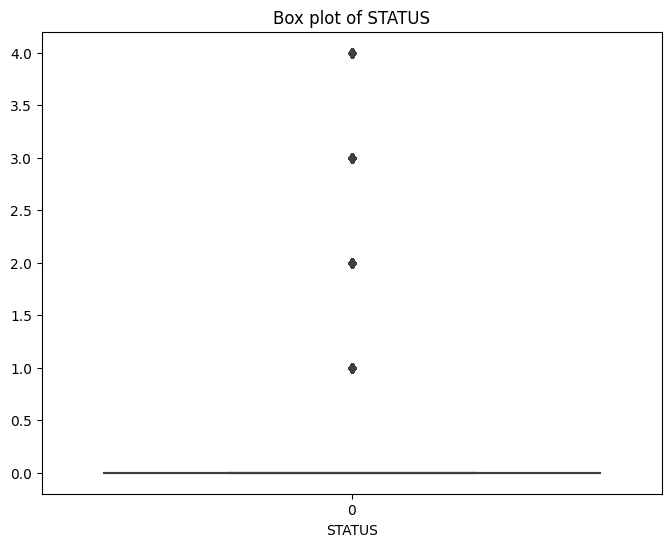

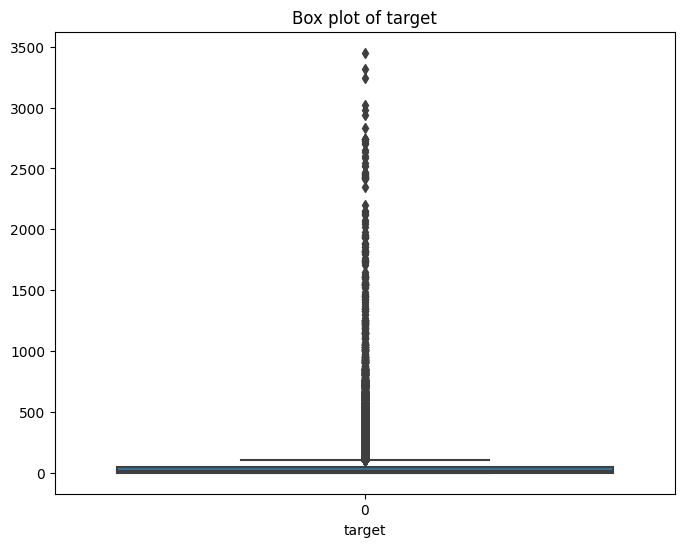

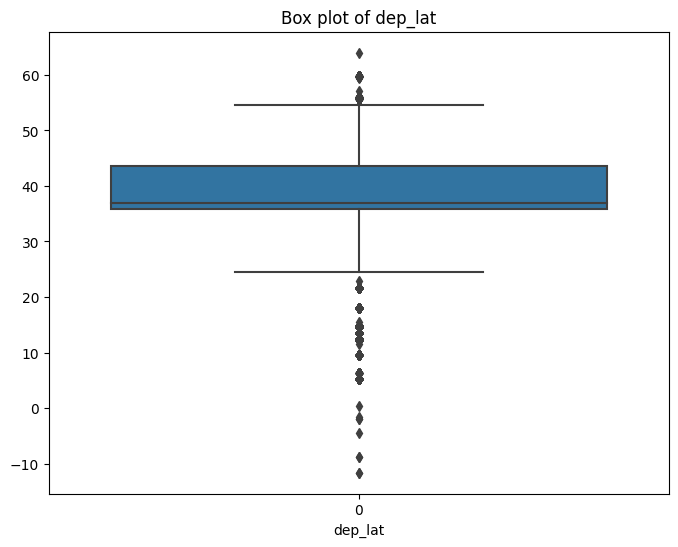

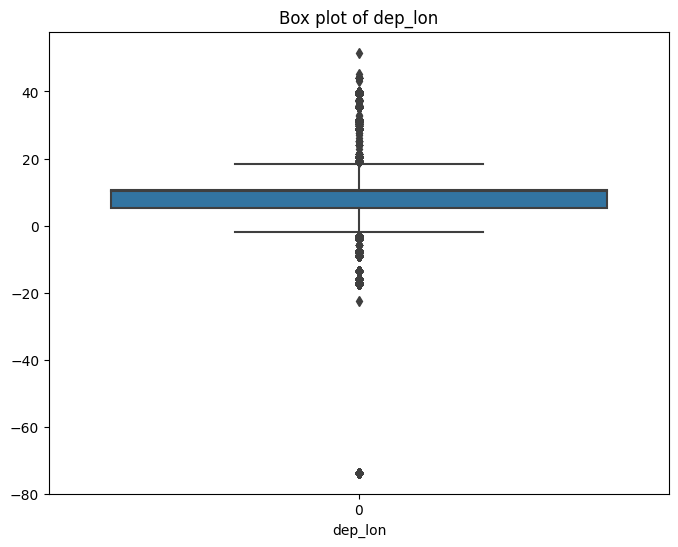

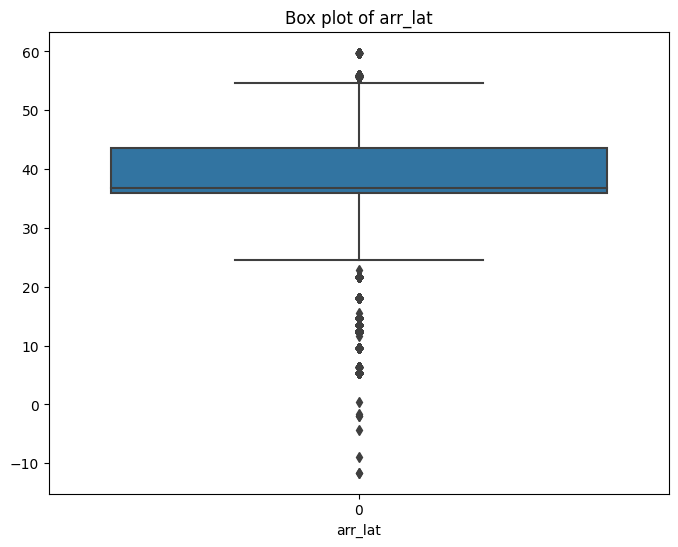

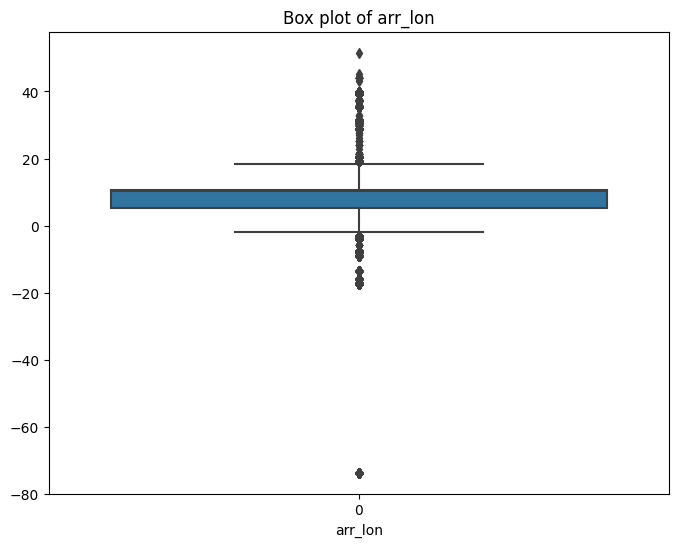

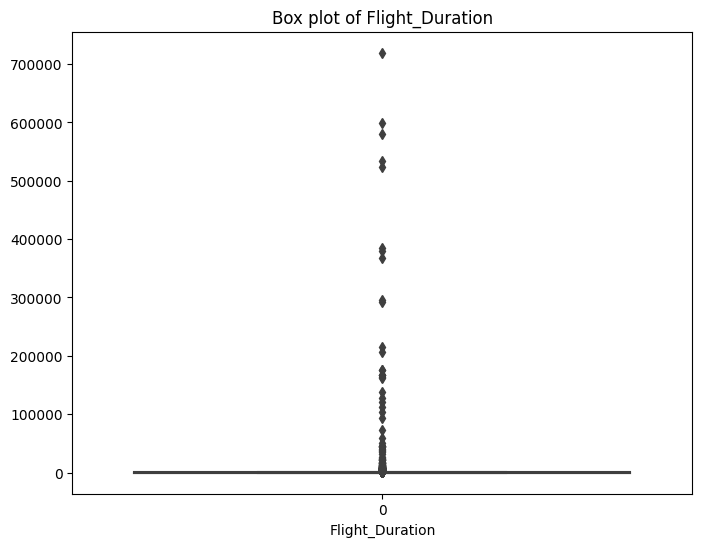

In [42]:
# Plot box plots for numeric features
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if column is numeric
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df[column])
        plt.title(f'Box plot of {column}')
        plt.xlabel(column)
        plt.show()

In [76]:
df1 = df.drop('target', axis =1)

In [77]:
from scipy import stats

# Example DataFrame df
# Assuming df is your DataFrame

# Calculate z-scores
z_scores = stats.zscore(df)

# Define threshold for z-score
threshold = 3

# Find outliers
outlier_indices = (z_scores > threshold).any(axis=1)

# Create new DataFrame without outliers
df_no_outliers = df[~outlier_indices]

# Optionally, you can reset the index of the new DataFrame
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers

,dep_lat,target,dep_lon,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
0,45.630600,20.0,8.72811,36.851002,10.22720,1,13,2,110.0
1,36.851002,0.0,10.22720,41.275333,28.75200,1,16,5,155.0
2,33.875000,0.0,10.77550,47.153198,-1.61073,1,17,6,170.0
3,36.851002,22.0,10.22720,36.691002,3.21541,1,17,6,80.0
4,43.629101,53.0,1.36382,36.851002,10.22720,1,17,6,115.0
...,...,...,...,...,...,...,...,...,...
95286,36.851002,0.0,10.22720,36.851002,10.22720,7,5,3,180.0
95287,33.875000,0.0,10.77550,36.851002,10.22720,1,13,5,60.0
95288,36.851002,0.0,10.22720,36.851002,10.22720,11,7,2,470.0
95289,36.851002,0.0,10.22720,33.875000,10.77550,1,23,1,45.0


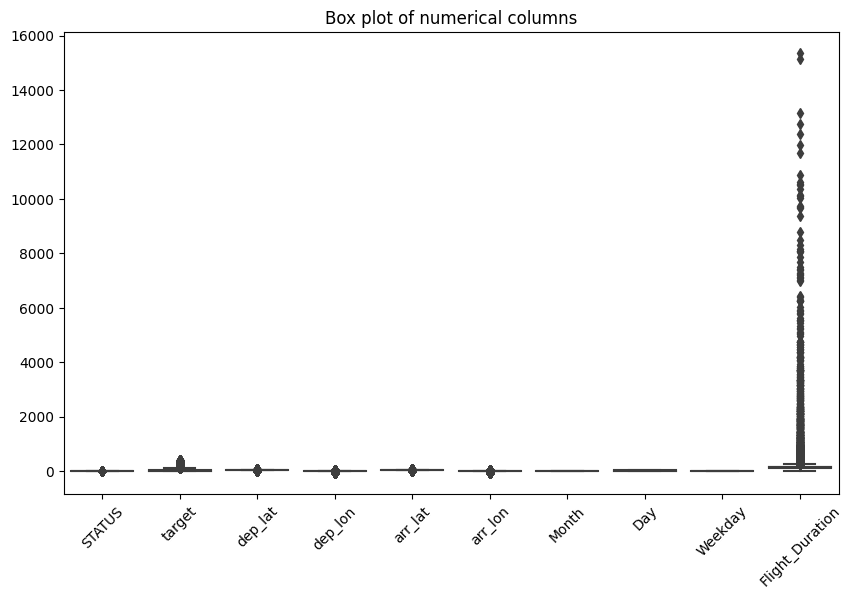

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers)
plt.title('Box plot of numerical columns')
plt.xticks(rotation=45)
plt.show()

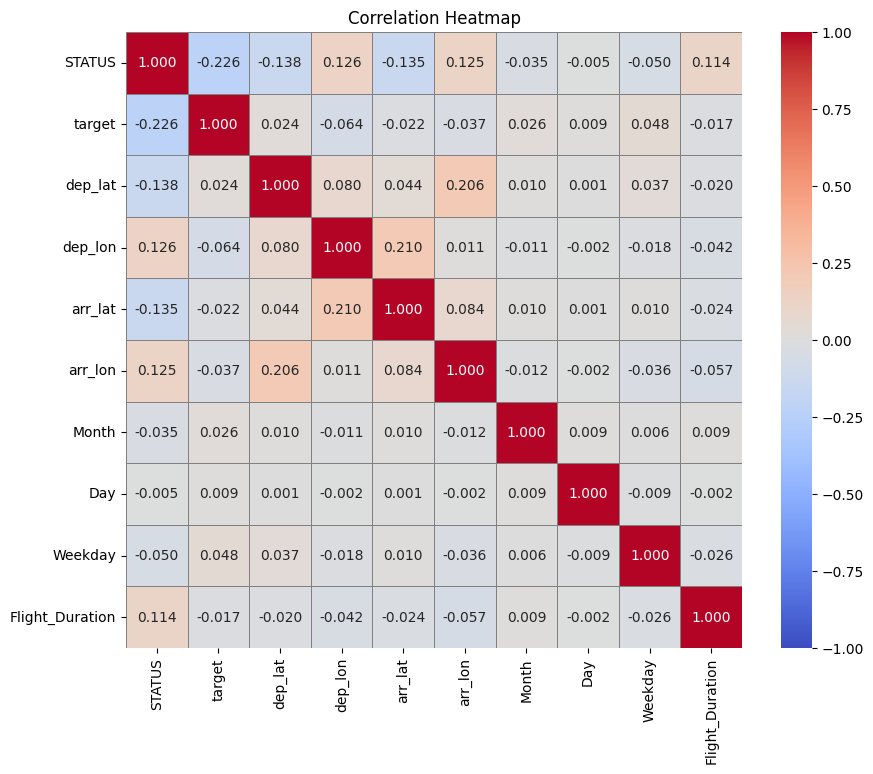

In [55]:
# Generate correlation matrix
corr_matrix = df_no_outliers.corr()

# Create heatmap with adjusted annotation size
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 10}, vmin=-1, vmax=1, fmt=".3f", cmap="coolwarm", linewidths=0.5, linecolor='grey', cbar=True, square=True)

plt.title('Correlation Heatmap')  # Add title to the heatmap
plt.show()

In [56]:

df_corr = pd.DataFrame(corr_matrix)

# Filter features that have correlation > 0.1 with the target
high_corr_features = df_corr[df_corr['target'].abs() > 0.1]

# Remove features that have correlation > 0.5 with other features
independent_features = high_corr_features.loc[:, (high_corr_features.abs() < 0.5).all()]

# Print the independent features
print("Independent features:")
print(independent_features.columns.tolist())

Independent features:
['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'Month', 'Day', 'Weekday', 'Flight_Duration']


In [57]:
independent_features

,dep_lat,dep_lon,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
STATUS,-0.137953,0.126367,-0.135396,0.124605,-0.035192,-0.004975,-0.050411,0.114399
target,0.024297,-0.064302,-0.022344,-0.037339,0.025617,0.008694,0.048294,-0.017206


In [60]:
# Reorder columns
df = df_no_outliers[['dep_lat','target', 'dep_lon', 'arr_lat', 'arr_lon', 'Month', 'Day', 'Weekday', 'Flight_Duration']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100152 entries, 0 to 100151
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   dep_lat          100152 non-null  float64
 1   target           100152 non-null  float64
 2   dep_lon          100152 non-null  float64
 3   arr_lat          100152 non-null  float64
 4   arr_lon          100152 non-null  float64
 5   Month            100152 non-null  int32  
 6   Day              100152 non-null  int32  
 7   Weekday          100152 non-null  int32  
 8   Flight_Duration  100152 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 5.7 MB


In [78]:
X = df[['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'Month', 'Day', 'Weekday']] # , 'Flight_Duration'
y = df['target']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (80121, 7)
X_test shape: (20031, 7)
y_train shape: (80121,)
y_test shape: (20031,)


In [80]:
from sklearn.linear_model import LinearRegression

# Now you can create a LinearRegression model
model = LinearRegression(n_jobs=-1)


In [81]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [82]:
y_predict = model.predict(X_test)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_predict)
print("R^2 Score:", r2)

Mean Squared Error: 3850.973515871749
R^2 Score: 0.010961186146858926


In [86]:
y_train_predict = model.predict(X_train)

# Calculate Mean Squared Error on the training data
mse_train = mean_squared_error(y_train, y_train_predict)
print("Mean Squared Error on train:", mse_train)
# Calculate R^2 score on the training data
r2_train = r2_score(y_train, y_train_predict)
print("R^2 Score on train:", r2_train)

Mean Squared Error on train: 3952.687551880706
R^2 Score on train: 0.009184198006643607
